自编码，简单来说就是把输入数据进行一个压缩和解压缩的过程。 原来有很多 Feature，压缩成几个来代表原来的数据，解压之后恢复成原来的维度，再和原数据进行比较。它是一种非监督算法，只需要输入数据，解压缩之后的结果与原数据本身进行比较。
<img src="imgs/autoencoder.png">

<img src="imgs/autoencoder2.png">
有时神经网络要接受大量的输入信息, 比如输入信息是高清图片时, 输入信息量可能达到上千万, 让神经网络直接从上千万个信息源中学习是一件很吃力的工作. 所以, 何不压缩一下, 提取出原图片中的最具代表性的信息, 缩减输入信息量, 再把缩减过后的信息放进神经网络学习. 这样学习起来就简单轻松了. 所以, 自编码就能在这时发挥作用. 通过将原数据白色的X 压缩, 解压 成黑色的X, 然后通过对比黑白 X ,求出预测误差, 进行反向传递, 逐步提升自编码的准确性. 训练好的自编码中间这一部分就是能总结原数据的精髓. 可以看出, 从头到尾, 我们只用到了输入数据 X, 并没有用到 X 对应的数据标签, 所以也可以说自编码是一种非监督学习. 到了真正使用自编码的时候. 通常只会用到自编码前半部分.

### 导包

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 加载数据

In [2]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

### 数据预处理

In [3]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5 # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5 # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### 构建模型
解压的环节，它的过程和压缩的过程是正好相反的。相对应层的激活函数也是一样的，不过在解压的最后一层用到的激活函数是tanh。因为输入值是由 -0.5 到 0.5 这个范围，在最后一层用这个激活函数的时候，它的输出是 -1 到 1，可以是作为一个很好的对应。

In [5]:
#函数模型
# in order to plot in a 2D figure
encoding_dim = 2  #28×28＝784维的数据压缩成 2 维的数据，然后在一个二维空间中可视化出分类的效果
# this is our input placeholder
input_img = Input(shape=(784,))
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoder = Dense(784, activation='tanh')(decoded)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoder)
# construct the encoder model for plotting
encoder = Model(inputs=input_img, outputs=encoder_output)

### 编译模型

In [6]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

### 训练模型

In [7]:
# training
#注意它的输入和输出是一样的，都是训练集的X
#旨在比较经过编码到解码还原出的图像与原始图像的差别
autoencoder.fit(x_train, x_train,epochs=10,batch_size=256,shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0687
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0561
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0534
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0503
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0484
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0475
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0467
Epoch 8/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0459
Epoch 9/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0452
Epoch 10/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0446


### 预测并绘制模型结果

(10000, 2)


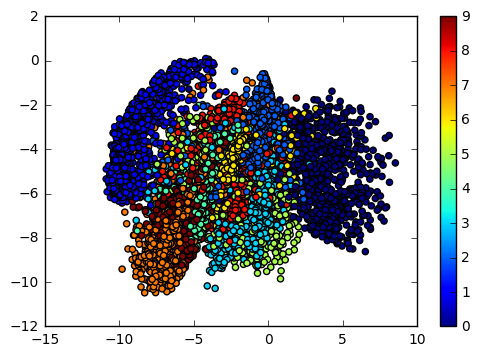

In [10]:
# plotting
#自编码模型可以把这几个数字给区分开来，我们可以用自编码这个过程来作为一个特征压缩的方法，
#和PCA的功能一样，效果要比它好一些
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()